# August

## 13th

### (M) 46. Permutations

Typical backtracking problem

Super fast but a bit disappointing memory usage because of the list copying part - 97 / 18

In [ ]:
nums = [1,2,3]

class Solution(object):
    def permute(self, nums):
        ans = []
        def Permutation(arr, permute):

          if arr == []:
            ans.append(permute)
            return

          arr_copy = arr[:] # This makes our memory usage score worse
                            # but was necessary at the same time because ..

          for num in arr_copy: # the list here is affected by remove() at each iteration
            
            arr.remove(num) # remove
            Permutation(arr, permute + [num])
            arr += [num] # and restore the array

        Permutation(nums, [])
        return ans

Solution().permute(nums)

[[1, 2, 3], [1, 3, 2], [2, 3, 1], [2, 1, 3], [3, 1, 2], [3, 2, 1]]

Memory efficient - 70 / 86

In [ ]:
nums = [1,2,3]

class Solution(object):
    def permute(self, nums):
        ans = []
        def Permutation(arr, permute):

          if arr == []:
            ans.append(permute)
            return

          for idx in range(len(arr)): 
            Permutation(arr[:idx] + arr[idx + 1:], permute + [arr[idx]]) # key lemma

        Permutation(nums, [])
        return ans

Solution().permute(nums)

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

##14th

### (E) 268. Missing Number

Follow up: Could you implement a solution using only O(1) extra space complexity and O(n) runtime complexity?

Satisfied follow-up - 94 / 45

In [ ]:
nums = [9,6,4,2,3,5,7,0,1]

class Solution(object):
    def missingNumber(self, nums):
        len_sum = [0, 0]
        for num in nums:
          len_sum[0], len_sum[1] = len_sum[0] + 1, len_sum[1] + num

        return ( ((len_sum[0] * (len_sum[0] + 1)) // 2) - len_sum[1] )

Solution().missingNumber(nums)

8

Almost the same -  75 / 86

In [ ]:
nums = [9,6,4,2,3,5,7,0,1]

class Solution(object):
    def missingNumber(self, nums):
        len_sum = [len(nums), sum(nums)]

        return ( ((len_sum[0] * (len_sum[0] + 1)) // 2) - len_sum[1] )

Solution().missingNumber(nums)

8

### (E) 100. Same Tree

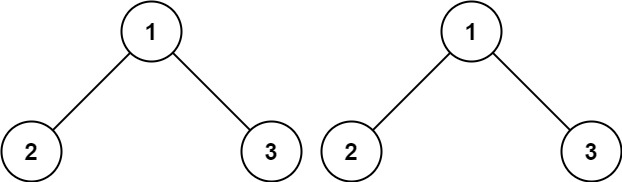

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

p = TreeNode(1)
p.left = TreeNode(2)
p.right = TreeNode(3)

q = TreeNode(1)
q.left = TreeNode(2)
q.right = TreeNode(3)
q.right.right = TreeNode(4)

In [ ]:
p = None
q = None

Preorder traversal with the tree 'p' and 'q' just follows those steps<br>
57 / 64

In [ ]:
class Solution(object):
    def isSameTree(self, p, q):
        
        if (p == None) and (q == None): return True
        
        if (p == None) or (q == None): return False

        stack_p = [p]
        stack_q = [q]

        while stack_p:
          cursor_p = stack_p.pop()
          cursor_q = stack_q.pop()

          if cursor_p.val != cursor_q.val: # value validating condition
            return False

          if cursor_p.right != None: # right subtree structure validating condition
            if cursor_q.right == None:
              return False
            stack_p.append(cursor_p.right)
            stack_q.append(cursor_q.right)
          else:
            if cursor_q.right != None:
              return False

          if cursor_p.left != None: # left subtree structure validating condition
            if cursor_q.left == None:
              return False
            stack_p.append(cursor_p.left)
            stack_q.append(cursor_q.left)
          else:
            if cursor_q.left != None:
              return False

        return True

Solution().isSameTree(p, q)

False

Chained expression

In [ ]:
class Solution(object):
    def isSameTree(self, p, q):
        
        if (p == None) and (q == None): return True
        if (p == None) or (q == None): return False

        stack_p, stack_q = [p], [q]

        while stack_p:
          cursor_p, cursor_q = stack_p.pop(), stack_q.pop()

          if cursor_p.val != cursor_q.val: # for validating values
            return False

          if cursor_p.right != None != cursor_q.right: ### Chained expression : same as 'cursor_p.right != None and cursor_q.right != None'
            stack_p.append(cursor_p.right)
            stack_q.append(cursor_q.right)
          elif cursor_p.right == None == cursor_q.right:
            pass
          else: return False
            
          if cursor_p.left != None != cursor_q.left:
            stack_p.append(cursor_p.left)
            stack_q.append(cursor_q.left)
          elif cursor_p.left == None == cursor_q.left :
            pass
          else: return False

        return True

Solution().isSameTree(p, q)

False

[Brilliant solution from LeetCode discussion](https://leetcode.com/problems/same-tree/discuss/32729/Shortest%2Bsimplest-Python)

In [ ]:
class Solution(object):
    def isSameTree(self, p, q):
        if p and q:
            return p.val == q.val and self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)
        return p is q